In [407]:
#MNIST Handwritten digits is classic dataset for classification task
#Here we are applying various Machine learning models to classify the digits
#
#import packages
import sklearn
import numpy
import matplotlib.pyplot as plt
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [416]:
#Loading the digits dataset
from sklearn.datasets import load_digits
df = load_digits()

In [417]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

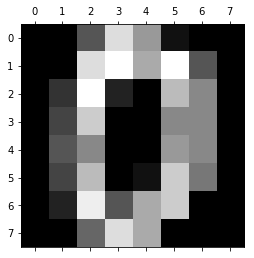

In [418]:
#Representation of the digit on gray scale
plt.gray()
plt.matshow(df.images[0])
plt.show()

In [419]:
#Taking out the features and targests from the dataset
X= df.data
y = df.target

In [420]:
print(X[67]) , print((y[67]))

[ 0.  0.  5. 14.  0.  0.  0.  0.  0.  0. 12.  9.  0.  0.  0.  0.  0.  0.
 15.  3.  0.  0.  0.  0.  0.  1. 16.  0.  0.  0.  0.  0.  0.  1. 16.  2.
  7.  4.  0.  0.  0.  3. 16. 16. 16. 16.  9.  0.  0.  0. 15. 15.  4. 10.
 16.  0.  0.  0.  4. 14. 16. 12.  7.  0.]
6


(None, None)

In [421]:
#Applying train_test_split on the data set
#Uncomment the following lines if u don't want to apply StratifiedKFold 
#from sklearn.model_selection import train_test_split
#X_train , X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

In [422]:
#Train and test shapes which are divided in 80:20 ratio
#print(X_train.shape, X_test.shape)
#y_train ,y_test  = y_train.ravel(), y_test.ravel()
#print((y_train.shape), (y_test.shape))

In [423]:
#Machine learning models with the hyperparameters tuned 
lr = LogisticRegression(C=1.0, max_iter = 200, multi_class ='auto', solver ='liblinear')
svm = SVC(C= 1.2 , gamma ='auto')
rf = RandomForestClassifier(n_estimators = 25, criterion = 'gini')

In [427]:
#Fitting the model function
def model_fit(model, X, Y, x_test, y_test):
    #Scaling the data as svm will prone to less
    #accuracy if not done
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    x_test = scaler.transform(x_test)
    
    #Fitting the model
    model = model.fit(X,Y)
    Y_pred = model.predict(x_test)
    print(accuracy_score(y_test , Y_pred))
    print(confusion_matrix(y_test , Y_pred))
    return model, Y_pred

In [443]:
#Applying the StratifiedKFold on the data set so it gives better accuracy and consistent results 
#than train_test_split
skf = StratifiedKFold(n_splits =10, random_state =42)
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
print("\nAccuracy and Confusion matrix for Logistic Regression")    
lr , lr_pred = model_fit(lr, X_train, y_train, X_test, y_test)
print("\nAccuracy and Confusion matrix for SVM")   
svm , svm_pred = model_fit(svm, X_train, y_train, X_test, y_test)
print("\nAccuracy and Confusion matrix for Random Forest")   
rf , rf_pred= model_fit(rf, X_train, y_train, X_test, y_test)


Accuracy and Confusion matrix for Logistic Regression
0.9318181818181818
[[17  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  2  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  3  0  0  3  0]
 [ 0  0  0  0 17  0  0  0  1  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  1  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  0 17  0]
 [ 0  0  0  1  0  1  0  0  0 16]]

Accuracy and Confusion matrix for SVM
0.9545454545454546
[[17  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  3  0  0  2  0]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  1  0 16  0  0]
 [ 0  0  0  0  0  0  0  0 17  0]
 [ 0  0  0  0  0  1  0  0  1 16]]

Accuracy and Confusion matrix for Random Forest
0.9261363636363636
[[17  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  3  0  0  4  0]
 [ 0  

In [448]:
#Writing the Predicted and actual results into a csv file
import pandas as pd
new_data_frame = pd.DataFrame(lr_pred, y_test, columns =['Actual'])
new_data_frame.to_csv(r"C:\Users\yarravarapu.p\Desktop\all_models.csv")


In [455]:
#Saving the model using Joblib we can also use pickle, json
from sklearn.externals import joblib
joblib_file = "joblib_model.pkl"
#Dumping the model
joblib.dump(rf, joblib_file)

['joblib_model.pkl']

In [456]:
#Loading the model
model = joblib.load(r"C:\Users\yarravarapu.p\joblib_model.pkl")
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [457]:
#Predicting the model on test data
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))
#print(accuracy_score(X_train, y_train))

0.9147727272727273
